In [1]:
#imports

import  tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time
import random

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
begin = time.time()

#vars

period = 10
LSTM_units = 256
Dense_units = 1

#data

data = pd.read_csv('all_stocks_5yr.csv')
companies = data.Name.unique()

In [3]:
#scale and organize data

def organizeData (data, companies, period):
    X_vals = []
    Y_vals = []
    for i in range (companies.shape[0]-1):
        close = data[data['Name'] == companies[i]].close
        volume = data[data['Name'] == companies[i]].volume
        
        scl = MinMaxScaler()
        close = close.values.reshape(-1, 1)
        close = scl.fit_transform(close)
        
        scl = MinMaxScaler()
        volume = volume.values.reshape(-1, 1)
        volume = scl.fit_transform(volume)
        
        X = []
        Y = []
        
        X, Y = increment(close, volume, period)
        
        X_vals.extend(X)
        Y_vals.extend(Y)
    
    print (np.array(X_vals).shape, np.array(Y_vals).shape)
    return np.array(X_vals), np.array(Y_vals)

def increment(c, v, period):
    X,Y = [], []
    for i in range(len(c)-period-2):
        A = []
        A.append(c[i:(i+period),0])
        A.append(v[i:(i+period),0])
        X.append(A)
        
        if ((c[(i+period+1)]) > c[(i+period)]):
            Y.append(1)
        else:
            Y.append(0)
    
    return np.array(X),np.array(Y)

start = time.time()

X, Y = organizeData(data, companies, period)

end = time.time()
print(end - start)

X_train, X_test = X[:int(X.shape[0]*0.90)], X[int(X.shape[0]*0.90):]
Y_train, Y_test = Y[:int(Y.shape[0]*0.90)], Y[int(Y.shape[0]*0.90):]

c:\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(611733, 2, 10) (611733,)
31.53863501548767


In [4]:
#algorithm

model = Sequential()
model.add(LSTM(LSTM_units, input_shape = (2, period)))
model.add(Dense(Dense_units))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.00001, patience = 10,
                     verbose = 0, mode = 'auto')

#if using callbacks, put after epochs ", callbacks = [stop]"

start = time.time()

History = model.fit(X_train, Y_train, epochs = 200, validation_split = 0.20, shuffle = False, verbose = 1)

end = time.time()
print(end - start)

Train on 440447 samples, validate on 110112 samples
Epoch 1/200
440447/440447 [==============================] - 68s 154us/step - loss: 0.2506 - acc: 0.5143 - val_loss: 0.2495 - val_acc: 0.5154
Epoch 2/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2496 - acc: 0.5188 - val_loss: 0.2493 - val_acc: 0.5221
Epoch 3/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2494 - acc: 0.5203 - val_loss: 0.2493 - val_acc: 0.5238
Epoch 4/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2493 - acc: 0.5210 - val_loss: 0.2493 - val_acc: 0.5243
Epoch 5/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2493 - acc: 0.5217 - val_loss: 0.2492 - val_acc: 0.5245
Epoch 6/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2493 - acc: 0.5220 - val_loss: 0.2492 - val_acc: 0.5246
Epoch 7/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2493 - acc

Epoch 58/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2471 - acc: 0.5349 - val_loss: 0.2498 - val_acc: 0.5248
Epoch 59/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2471 - acc: 0.5355 - val_loss: 0.2498 - val_acc: 0.5255
Epoch 60/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2471 - acc: 0.5356 - val_loss: 0.2499 - val_acc: 0.5233
Epoch 61/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2470 - acc: 0.5356 - val_loss: 0.2500 - val_acc: 0.5250
Epoch 62/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2470 - acc: 0.5358 - val_loss: 0.2499 - val_acc: 0.5242
Epoch 63/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2469 - acc: 0.5355 - val_loss: 0.2502 - val_acc: 0.5247
Epoch 64/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2468 - acc: 0.5363 - val_loss: 0.2499 - val_acc: 0.5252

440447/440447 [==============================] - 63s 142us/step - loss: 0.2436 - acc: 0.5487 - val_loss: 0.2521 - val_acc: 0.5258
Epoch 116/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2434 - acc: 0.5493 - val_loss: 0.2523 - val_acc: 0.5255
Epoch 117/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2434 - acc: 0.5493 - val_loss: 0.2525 - val_acc: 0.5258
Epoch 118/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2432 - acc: 0.5497 - val_loss: 0.2526 - val_acc: 0.5260
Epoch 119/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2432 - acc: 0.5494 - val_loss: 0.2528 - val_acc: 0.5245
Epoch 120/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2432 - acc: 0.5496 - val_loss: 0.2527 - val_acc: 0.5255
Epoch 121/200
440447/440447 [==============================] - 64s 145us/step - loss: 0.2431 - acc: 0.5502 - val_loss: 0.2531 - val_acc: 0.5248
Epoch 

Epoch 172/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2401 - acc: 0.5600 - val_loss: 0.2574 - val_acc: 0.5258
Epoch 173/200
440447/440447 [==============================] - 63s 142us/step - loss: 0.2400 - acc: 0.5600 - val_loss: 0.2575 - val_acc: 0.5275
Epoch 174/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2400 - acc: 0.5606 - val_loss: 0.2579 - val_acc: 0.5248
Epoch 175/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2401 - acc: 0.5605 - val_loss: 0.2571 - val_acc: 0.5261
Epoch 176/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2399 - acc: 0.5614 - val_loss: 0.2583 - val_acc: 0.5274
Epoch 177/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2400 - acc: 0.5606 - val_loss: 0.2576 - val_acc: 0.5267
Epoch 178/200
440447/440447 [==============================] - 63s 143us/step - loss: 0.2398 - acc: 0.5610 - val_loss: 0.2578 - val_acc:

In [5]:
def randomPredictions (Y_test):
    oneZero = []
    rand = []
    for i in range (Y_test.shape[0]):
        oneZero.append((i%2))
        rand.append(random.randint(0, 1))
    return np.array(oneZero), np.array(rand)

def convertPredictions (predictions):
    _predictions = []
    for i in range (np.array(predictions).shape[0]):
        if (predictions[i] > 0.500):
            _predictions.append(1)
        else:
            _predictions.append(0)
    return _predictions

def calcPercentCorrect (Y_test, predictions):
    numCorrect = 0
    for i in range (np.array(predictions).shape[0]):
        if (Y_test[i] == predictions[i]):
            numCorrect = (numCorrect + 1)
    return (100*(numCorrect / np.array(predictions).shape[0]))

predictions = model.predict(X_test)
oneZero, rand = randomPredictions(Y_test)
percentCorrect = calcPercentCorrect(Y_test, convertPredictions(predictions))
oneZeroPercent = calcPercentCorrect(Y_test, oneZero)
randPercent = calcPercentCorrect(Y_test, convertPredictions(rand))
print (percentCorrect)
print (oneZeroPercent)
print (randPercent)

53.03396867950436
50.18798836106843
50.11115833524046


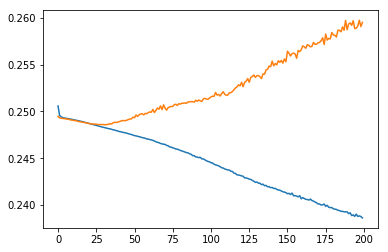

In [6]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])

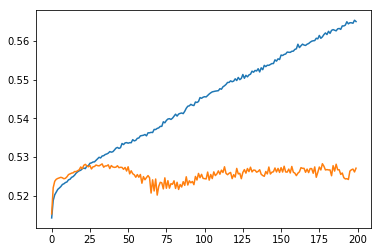

In [7]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])

In [8]:
stop = time.time()
print (stop - begin)

12721.694209814072


In [11]:
model.save('Algo3')